In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '../Data/ecommerce_data.csv',
    parse_dates=[
        'PURCHASE_TS'
        , 'PURCHASE_TS_CLEANED'
        , 'SHIP_TS', 'DELIVERY_TS'
        , 'REFUND_TS'
        , 'REFUND_TS_CLEANED'
        , 'CREATED_ON'
    ], # parse the date columns
    date_format="%m/%d/%y", # use the correct date format
    keep_default_na=False  # prevent interpreting 'NA' as null
)
df.head(10)

/var/folders/zc/y15z5jlx6sdg3444ndgx0v5r0000gn/T/ipykernel_14803/2865621916.py:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,USER_ID,ORDER_ID,PURCHASE_TS,PURCHASE_TS_CLEANED,PURCHASE_MONTH,PURCHASE_YEAR,SHIP_TS,DELIVERY_TS,REFUND_TS,REFUND_TS_CLEANED,...,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,LOYALTY_PROGRAM,CREATED_ON,REGION,DAYS_PURCHASE_TO_DELIVER,DAYS_SHIP_TO_DELIVER,ACC_AGE_AT_PURCHASE
0,87a90f08,786993373,12/24/20,2020-12-24,12/1/20,2020,2020-12-25,2021-01-02,2025-12-02,NaT,...,website,direct,desktop,US,0,2020-09-22,NA,9,8,93
1,1571b7e3,4795499029,5/21/20,2020-05-21,5/1/20,2020,2020-05-24,2020-05-28,2025-04-10,NaT,...,website,direct,desktop,US,0,2020-03-11,NA,7,4,71
2,87a90f08,786993373,12/24/20,2020-12-24,12/1/20,2020,2020-12-25,2021-01-02,2023-12-02,2023-12-02,...,website,direct,desktop,US,0,2020-09-22,NA,9,8,93
3,5bd86237,6693651352,9/19/19,2019-09-19,9/1/19,2019,2019-09-21,2019-09-29,2023-11-12,2023-11-12,...,website,email,mobile,CA,0,2019-08-28,NA,10,8,22
4,60a2888a,6d994cb0b1d,7/14/21,2021-07-14,7/1/21,2021,2021-07-16,2021-07-21,2023-05-31,2023-05-31,...,mobile app,direct,desktop,US,1,2021-05-05,NA,7,5,70
5,48d47fab,77ab79ada2e,7/6/21,2021-07-06,7/1/21,2021,2021-07-07,2021-07-11,2023-05-31,2023-05-31,...,website,email,mobile,US,0,2015-01-09,NA,5,4,2370
6,5e5556ee,0c0e2ac958b,7/5/21,2021-07-05,7/1/21,2021,2021-07-07,2021-07-14,2023-05-31,2023-05-31,...,website,email,mobile,CA,1,2021-03-19,NA,9,7,108
7,ab2ca7b6,c64302ef6d8,6/26/21,2021-06-26,6/1/21,2021,2021-06-29,2021-07-04,2023-05-31,2023-05-31,...,website,direct,desktop,GB,1,2021-02-26,EMEA,8,5,120
8,2d118028,f54677b55c0,6/24/21,2021-06-24,6/1/21,2021,2021-06-27,2021-07-03,2023-05-31,2023-05-31,...,website,direct,desktop,GB,1,2014-04-10,EMEA,9,6,2632
9,9907ae5f,3b93be6b77e,6/14/21,2021-06-14,6/1/21,2021,2021-06-16,2021-06-24,2023-05-31,2023-05-31,...,website,direct,desktop,DE,0,2011-07-12,EMEA,10,8,3625


In [3]:
df.drop(columns=[
    'PURCHASE_TS'
    , 'REFUND_TS'
    , 'PURCHASE_MONTH'
    , 'PURCHASE_YEAR'
    , 'PRODUCT_NAME'
    , 'DAYS_PURCHASE_TO_DELIVER'
    , 'DAYS_SHIP_TO_DELIVER'
    , 'ACC_AGE_AT_PURCHASE'
], inplace=True) # unneeded columns/calculations

# Rename the '_CLEANED' columns to their original names
df.rename(columns={
    'PURCHASE_TS_CLEANED': 'PURCHASE_TS',
    'REFUND_TS_CLEANED': 'REFUND_TS',
    'PRODUCT_NAME_CLEANED': 'PRODUCT_NAME'
}, inplace=True)

df.columns

Index(['USER_ID', 'ORDER_ID', 'PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS',
       'REFUND_TS', 'REFUNDED', 'PRODUCT_NAME', 'PRODUCT_ID', 'USD_PRICE',
       'LOCAL_PRICE', 'CURRENCY', 'PURCHASE_PLATFORM', 'MARKETING_CHANNEL',
       'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE', 'LOYALTY_PROGRAM',
       'CREATED_ON', 'REGION'],
      dtype='object')

In [4]:
# Standardize column names to lowercase
df.columns = df.columns.str.lower()

df.columns

Index(['user_id', 'order_id', 'purchase_ts', 'ship_ts', 'delivery_ts',
       'refund_ts', 'refunded', 'product_name', 'product_id', 'usd_price',
       'local_price', 'currency', 'purchase_platform', 'marketing_channel',
       'account_creation_method', 'country_code', 'loyalty_program',
       'created_on', 'region'],
      dtype='object')

In [5]:
df['usd_price'] = pd.to_numeric(df['usd_price'], errors='coerce') # convert to numeric

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108127 entries, 0 to 108126
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  108127 non-null  object        
 1   order_id                 108127 non-null  object        
 2   purchase_ts              108124 non-null  datetime64[ns]
 3   ship_ts                  108127 non-null  datetime64[ns]
 4   delivery_ts              108127 non-null  datetime64[ns]
 5   refund_ts                5377 non-null    datetime64[ns]
 6   refunded                 108127 non-null  int64         
 7   product_name             108127 non-null  object        
 8   product_id               108127 non-null  object        
 9   usd_price                108094 non-null  float64       
 10  local_price              108127 non-null  float64       
 11  currency                 108127 non-null  object        
 12  purchase_platfor

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # avoids scientific notation

df.describe()

,purchase_ts,ship_ts,delivery_ts,refund_ts,refunded,usd_price,local_price,loyalty_program,created_on
count,108124,108127,108127,5377,108127.00,108094.00,108127.00,108127.00,108127
mean,2021-01-29 21:59:53.873700608,2021-01-31 22:07:31.136164096,2021-02-06 10:05:34.073820416,2022-07-19 23:29:44.266319616,0.05,260.08,5270.95,0.42,2019-07-26 05:41:15.921832448
min,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-06 00:00:00,2020-11-28 00:00:00,0.00,0.00,0.00,0.00,2005-05-25 00:00:00
25%,2020-05-16 00:00:00,2020-05-18 00:00:00,2020-05-23 00:00:00,2022-04-10 00:00:00,0.00,49.98,110.40,0.00,2019-02-10 00:00:00
50%,2021-01-30 00:00:00,2021-02-01 00:00:00,2021-02-07 00:00:00,2022-08-17 00:00:00,0.00,168.00,168.00,0.00,2020-06-22 00:00:00
75%,2021-11-17 00:00:00,2021-11-19 00:00:00,2021-11-25 00:00:00,2023-01-08 00:00:00,0.00,329.27,408.00,1.00,2021-05-21 00:00:00
max,2022-12-31 00:00:00,2023-01-03 00:00:00,2023-01-10 00:00:00,2023-12-02 00:00:00,1.00,3146.88,2059200.00,1.00,2023-01-29 00:00:00
std,NaN,NaN,NaN,NaN,0.22,339.71,61011.73,0.49,NaN


In [8]:
df['region'].value_counts()

region
NA       55805
EMEA     31801
APAC     13100
LATAM     7259
#N/A       162
Name: count, dtype: int64

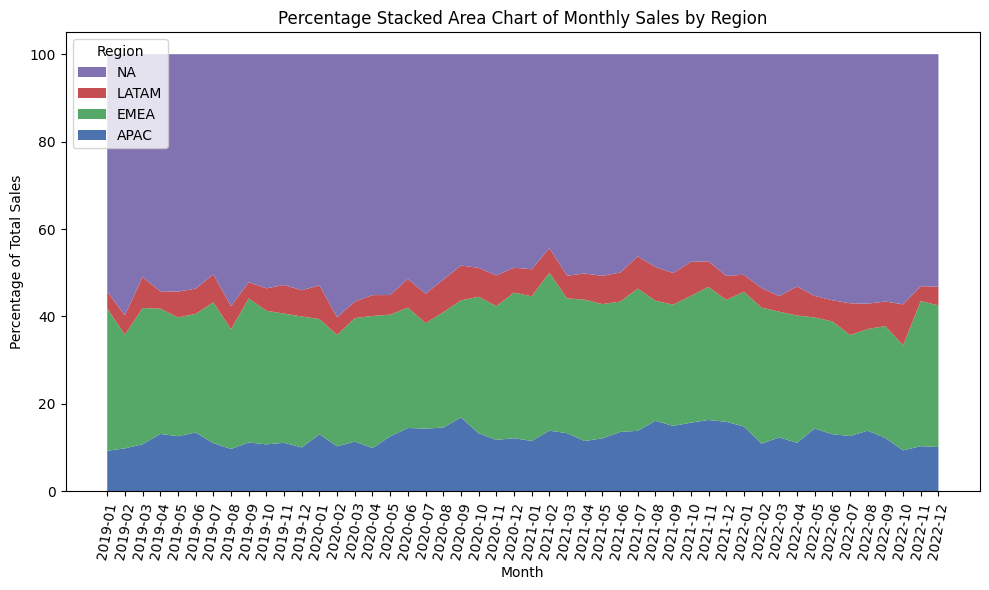

In [27]:
# Convert the 'usd_price' column to numeric, handling any invalid values by setting them to NaN
df['usd_price'] = pd.to_numeric(df['usd_price'], errors='coerce')

# Remove rows where 'region' is '#N/A', but keep those where 'region' is 'NA'
df = df[df['region'] != '#N/A']

# Extract the month from 'purchase_ts' and format it as 'YYYY-MM'
df['month'] = df['purchase_ts'].dt.to_period('M')

# Group the data by region and month, then calculate total sales for each group
monthly_sales = df.groupby(['region', 'month'])['usd_price'].sum().reset_index()

# Pivot the DataFrame so that each region becomes a column, with months as rows
pivot_df = monthly_sales.pivot(index='month', columns='region', values='usd_price').fillna(0)

# Normalize the values row-wise to calculate the percentage contribution of each region per month
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Set the plot style and size, then create the stacked area chart with the percentage data
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_df_percent.index.astype(str), pivot_df_percent.T, labels=pivot_df.columns)

# Reverse the order of the legend so the order matches the stacking
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

# Add titles and labels for better readability, and rotate the x-axis labels for a cleaner look
plt.title('Percentage Stacked Area Chart of Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=80)
plt.tight_layout()

# Display the final plot
plt.show()

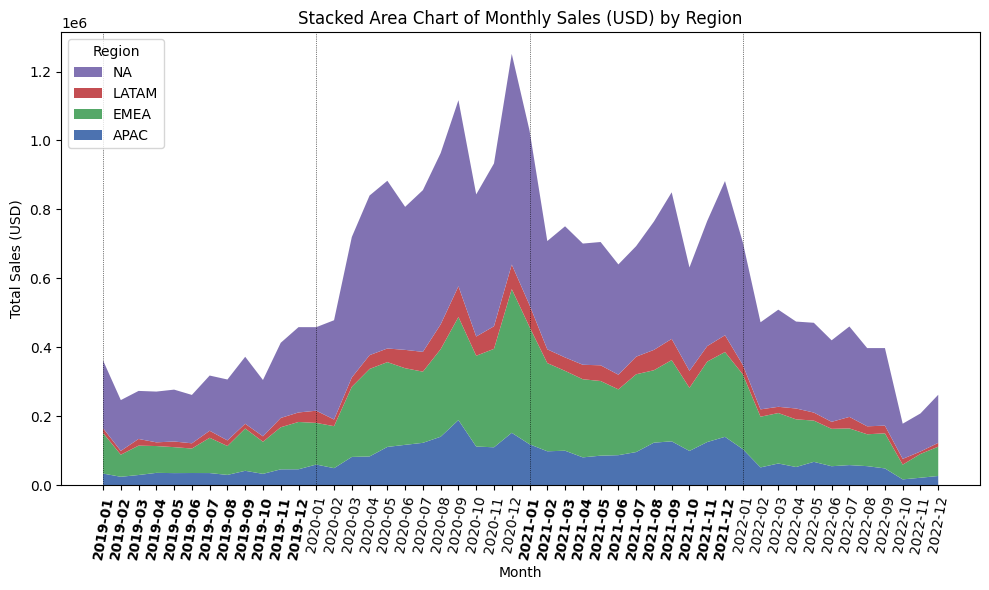

In [30]:
# Plot the stacked area chart (showing total sales)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10, 6))

# Stackplot for total sales by region
plt.stackplot(pivot_df.index.astype(str), pivot_df.T, labels=pivot_df.columns)

# Add vertical lines at the start of each year
for year in ['2019', '2020', '2021', '2022']:
    plt.axvline(x=year + '-01', color='black', linestyle=':', linewidth=0.5)

# Reverse the legend (optional)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

# Add titles and labels
plt.title('Stacked Area Chart of Monthly Sales (USD) by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')

# Customize x-ticks for readability
plt.xticks(rotation=80)
xticks = plt.gca().get_xticklabels()
for tick in xticks:
    if '2019' in tick.get_text() or '2021' in tick.get_text():
        tick.set_fontweight('bold')

plt.tight_layout()

plt.show()

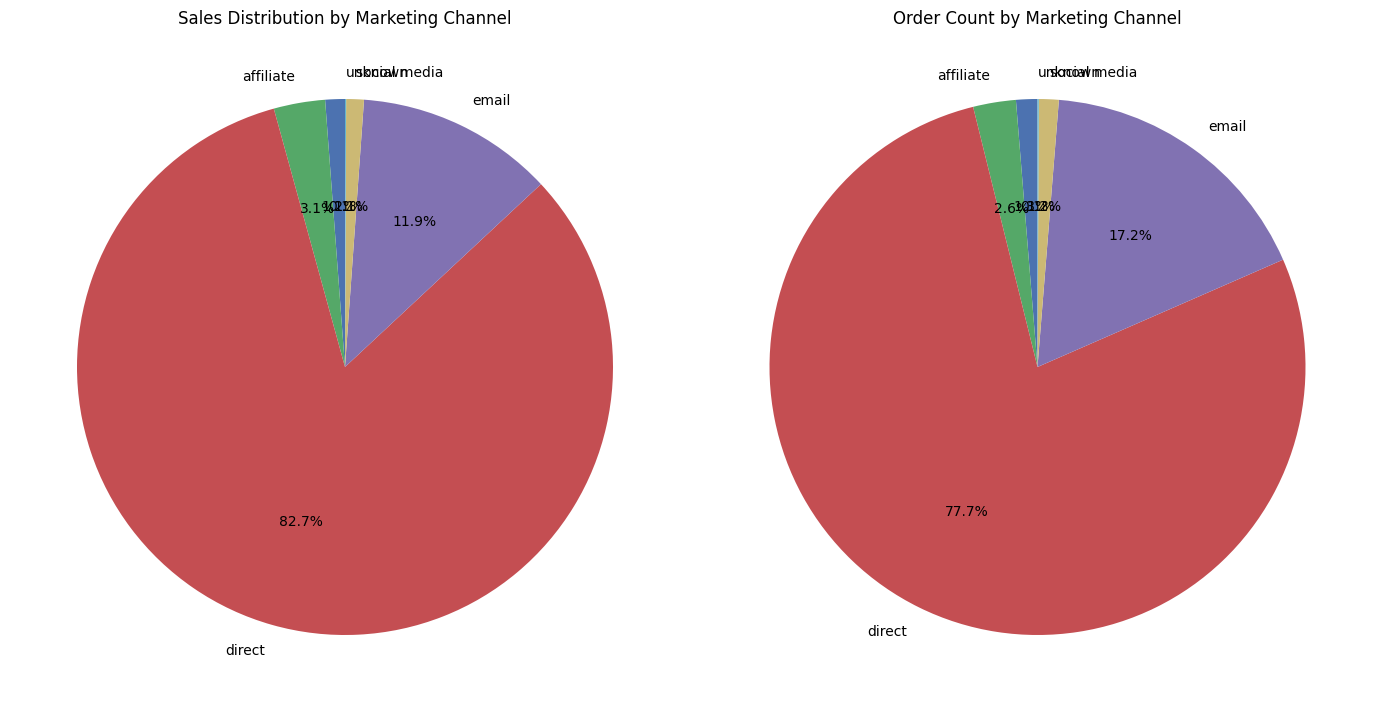

In [31]:
# Grouping by 'marketing_channel' to calculate total sales and order count
sales_by_channel = df.groupby('marketing_channel')['usd_price'].sum()
orders_by_channel = df.groupby('marketing_channel')['order_id'].count()

# Set up the figure for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Sales Distribution by Channel
axes[0].pie(sales_by_channel, labels=sales_by_channel.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sales Distribution by Marketing Channel')

# Pie chart for Order Count by Channel
axes[1].pie(orders_by_channel, labels=orders_by_channel.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Order Count by Marketing Channel')

# Display the charts
plt.tight_layout()
plt.show()

In [36]:
# Annual records; showing the sum of usd_price, average of usd_price, and count of order_id
# Also the growth rate for sales, AOV, and order count
annual_summary = df.groupby(df['purchase_ts'].dt.year).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

# Calculate the growth rate for each metric
annual_summary['sales_growth_rate'] = annual_summary['total_sales'].pct_change() * 100
annual_summary['aov_growth_rate'] = annual_summary['avg_sales'].pct_change() * 100
annual_summary['order_growth_rate'] = annual_summary['total_orders'].pct_change() * 100

annual_summary

,purchase_ts,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
0,2019.00,3865365.09,229.82,16821,NaN,NaN,NaN
1,2020.00,10151141.38,300.48,33791,162.62,30.75,100.89
2,2021.00,9122295.77,254.90,35809,-10.14,-15.17,5.97
3,2022.00,4956169.86,230.10,21541,-45.67,-9.73,-39.84


In [37]:
# annual summary but region-wise
annual_region_summary = df.groupby(['region', df['purchase_ts'].dt.year]).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate the growth rate for each metric
annual_region_summary['sales_growth_rate'] = annual_region_summary.groupby('region')['total_sales'].pct_change() * 100
annual_region_summary['aov_growth_rate'] = annual_region_summary.groupby('region')['avg_sales'].pct_change() * 100
annual_region_summary['order_growth_rate'] = annual_region_summary.groupby('region')['total_orders'].pct_change() * 100

annual_region_summary

total_sales  avg_sales  total_orders  sales_growth_rate  \
region purchase_ts                                                            
APAC   2019.00        423856.87     211.93          2000                NaN   
       2020.00       1327479.39     317.28          4184             213.19   
       2021.00       1280434.25     289.36          4426              -3.54   
       2022.00        620410.19     249.16          2490             -51.55   
EMEA   2019.00       1152885.10     221.03          5218                NaN   
       2020.00       2893693.63     287.64         10067             151.00   
       2021.00       2795909.69     269.28         10398              -3.38   
       2022.00       1374451.41     224.77          6117             -50.84   
LATAM  2019.00        206996.42     238.20           869                NaN   
       2020.00        625714.10     295.01          2122             202.28   
       2021.00        587140.17     214.60          2741              -6.16   
       2022.00        255804.52     167.52          1527             -56.43   
NA     2019.00       2081626.70     238.34          8734                NaN   
       2020.00       5304254.26     304.53         17418             154.81   
       2021.00       4458811.66     244.40         18244             -15.94   
       2022.00       2705503.74     237.18         11407             -39.32   

                    aov_growth_rate  order_growth_rate  
region purchase_ts                                      
APAC   2019.00                  NaN                NaN  
       2020.00                49.71             109.20  
       2021.00                -8.80               5.78  
       2022.00               -13.89             -43.74  
EMEA   2019.00                  NaN                NaN  
       2020.00                30.14              92.93  
       2021.00                -6.38               3.29  
       2022.00               -16.53             -41.17  
LATAM  2019.00                  NaN                NaN  
       2020.00                23.85             144.19  
       2021.00               -27.26              29.17  
       2022.00               -21.94             -44.29  
NA     2019.00                  NaN                NaN  
       2020.00                27.77              99.43  
       2021.00               -19.74               4.74  
       2022.00                -2.95             -37.48

In [38]:
# Monthly summary with same metrics and growth rates
monthly_summary = df.groupby(df['purchase_ts'].dt.to_period('M')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

# Calculate the growth rate for each metric
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100

monthly_summary

,purchase_ts,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
0,2019-01,361879.52,217.61,1663,NaN,NaN,NaN
1,2019-02,246731.70,219.51,1124,-31.82,0.88,-32.41
2,2019-03,273360.95,218.17,1253,10.79,-0.61,11.48
3,2019-04,271429.90,221.03,1228,-0.71,1.32,-2.00
4,2019-05,277090.83,235.22,1178,2.09,6.42,-4.07
5,2019-06,261739.64,234.74,1115,-5.54,-0.20,-5.35
6,2019-07,317950.29,234.65,1355,21.48,-0.04,21.52
7,2019-08,306464.79,223.70,1370,-3.61,-4.67,1.11
8,2019-09,372387.51,234.06,1591,21.51,4.63,16.13
9,2019-10,304988.71,242.25,1259,-18.10,3.50,-20.87


In [40]:
# Product performance; product_name, sales, percent of total sales, aov, count, count %, and refund rate based on boolean column refunded. sorted by total sales
product_performance = df.groupby('product_name').agg(
    total_sales=('usd_price', 'sum'),
    percent_total_sales=('usd_price', lambda x: x.sum() / df['usd_price'].sum() * 100),
    aov=('usd_price', 'mean'),
    total_orders=('order_id', 'count'),
    order_count_percent=('order_id', lambda x: x.count() / df['order_id'].count() * 100),
    refund_rate=('refunded', 'mean')
).sort_values('total_sales', ascending=False)

product_performance

,total_sales,percent_total_sales,aov,total_orders,order_count_percent,refund_rate
product_name,,,,,,
27in 4K gaming monitor,9848296.09,35.05,420.83,23402,21.68,0.06
Apple Airpods Headphones,7731475.63,27.52,159.90,48351,44.78,0.05
Macbook Air Laptop,6292857.30,22.40,1588.30,3962,3.67,0.11
ThinkPad Laptop,3204061.56,11.40,1099.54,2914,2.70,0.12
Samsung Charging Cable Pack,440954.24,1.57,20.20,21842,20.23,0.01
Samsung Webcam,361018.61,1.28,50.44,7179,6.65,0.03
Apple iPhone,213327.59,0.76,740.72,288,0.27,0.08
Bose Soundsport Headphones,3339.04,0.01,123.67,27,0.03,0.00
